In [256]:
from pylab import *
from PIL import Image
import os
from sklearn.svm import SVC
ion()
%gui inline
image_name = 'ACTIONVALIDATERANDOMPICTURE.APPPROCESS.2.jpg'

In [ ]:
# 获取图片
for i in range(100):
    os.system('https://aao.qianhao.aiursoft.com/ACTIONVALIDATERANDOMPICTURE.APPPROCESS')

(20, 60, 3)


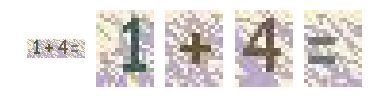

In [109]:
# 读取图片
img = imread(image_name)
subplot(151);imshow(img);axis('off')
subplot(152);imshow(img[:, :15, :]);axis('off')
subplot(153);imshow(img[:, 15:30, :]);axis('off')
subplot(154);imshow(img[:, 30:45, :]);axis('off')
subplot(155);imshow(img[:, 45:, :]);axis('off')
print(img.shape)

<class 'numpy.ndarray'>
(20, 60)


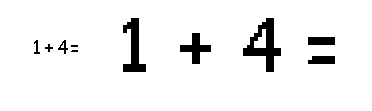

In [113]:
# 二值化并分割
img = Image.open(image_name)
gray = img.convert('L')
img.crop((0,0,15,15))
img.crop((0,0,15,20))
g = array(gray.getdata())
binary = array([1 if i > 128 else 0 for i in g])
binary=binary.reshape(gray.size[::-1])

img=binary
print(type(img))
subplot(151);imshow(img, cmap='gray');axis('off')
subplot(152);imshow(img[:, :15, ...], cmap='gray');axis('off')
subplot(153);imshow(img[:, 15:30, ...], cmap='gray');axis('off')
subplot(154);imshow(img[:, 30:45, ...], cmap='gray');axis('off')
subplot(155);imshow(img[:, 45:, ...], cmap='gray');axis('off')
print(img.shape)

In [115]:
def preprocess(img):
    # 二值化并分割
    # img -> PIL
    gray = img.convert('L')
    g = array(gray.getdata())
    binary = array([1 if i > 128 else 0 for i in g])
    img=binary.reshape(gray.size[::-1])
    
    return img[:, :15, ...], img[:, 15:30, ...], img[:, 30:45, ...], img[:, 45:, ...]


In [119]:
# 读取图片，放到列表内
nums, chars = list(), list()
for image_name in os.listdir():
    if image_name.split('.')[-1] == 'jpg':
        images = preprocess(Image.open(image_name))
        nums.extend([images[0],images[2]])
        chars.append(images[1])

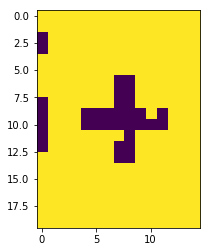

In [266]:
# 初步分类并保存
fig = figure()
if not os.path.exists('nums'):
    os.mkdir('nums')
if not os.path.exists('chars'):
    os.mkdir('chars')
for num, i in enumerate(nums):
    imshow(i)
    fig.savefig(filename='nums/{}.jpg'.format(num))
for num, i in enumerate(chars):
    imshow(i)
    fig.savefig(filename='chars/{}.jpg'.format(num))
